In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

## Question 1.

In [2]:
data = pd.read_csv("D:\Data Science Materials Amrita MTech\ML\mnist_train.csv")  # Reading the dataset

In [3]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
l = data["label"]        # l contains label
d = data.drop("label",axis=1) 
# d contains features

In [5]:
d.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
l.head(20)

0     5
1     0
2     4
3     1
4     9
5     2
6     1
7     3
8     1
9     4
10    3
11    5
12    3
13    6
14    1
15    7
16    2
17    8
18    6
19    9
Name: label, dtype: int64

In [7]:
d.shape

(60000, 784)

In [8]:
l.shape

(60000,)

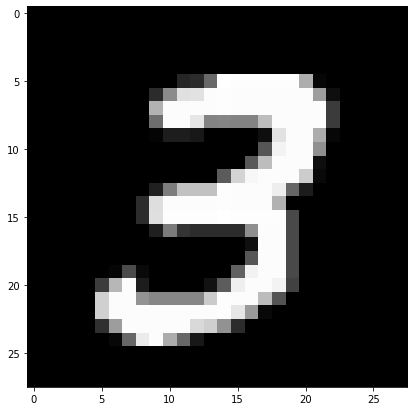

3


In [9]:
# Displaying or plotting a number
plt.figure(figsize=(7,7))
idx = 7                # displaying 7th data
grid_data = d.iloc[idx].to_numpy().reshape(28,28) # from 1 D to 2D
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()
print(l[idx])


In [10]:
# Reducing freature dimension using SVD
svd = TruncatedSVD(n_components = 25)   # By default n_components = 2.
x = svd.fit(d).transform(d)

l_m = RandomForestClassifier(n_estimators=50)
x_train, x_test, y_train, y_test = train_test_split(x,l,test_size=0.2, random_state=4)
l_m.fit(x_train,y_train)
pred = l_m.predict(x_test)
s = y_test.values
count = 0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count = count + 1
count/float(len(pred))          

0.946

# Question 2

In [ ]:
# Classifying before applying SVD.

In [11]:
l_m = LogisticRegression(multi_class='ovr') # Using one VS rest for multiclass classification.
x_train, x_test, y_train, y_test = train_test_split(d,l,test_size=0.2, random_state=4)
l_m.fit(x_train,y_train)
pred = l_m.predict(x_test)

In [12]:
s = y_test.values
count = 0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count = count + 1
count/float(len(pred))       # Before feature reduction, we got an accuracy of 91%

0.9105833333333333

# Question 3

In [13]:
# Applying SVD and classifying using logistic regression.
svd = TruncatedSVD(n_components = 25)
x = svd.fit(d).transform(d)


l_m = LogisticRegression(multi_class='ovr') # Using one VS rest for multiclass classification.
x_train, x_test, y_train, y_test = train_test_split(x,l,test_size=0.2, random_state=4)
l_m.fit(x_train,y_train)
pred = l_m.predict(x_test)
s = y_test.values
count = 0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count = count + 1
count/float(len(pred))       # After feature reduction, we got an accuracy of 86%

0.8695

# Question 4

In [14]:
# Defining a function to reduce feature dimension to i components.

def svd_(i):
    svd = TruncatedSVD(n_components = i)
    x = svd.fit(d).transform(d)
    l_m = LogisticRegression(multi_class='ovr')   # Using one VS rest for multiclass classification.
    x_train, x_test, y_train, y_test = train_test_split(x,l,test_size=0.2, random_state=4)
    l_m.fit(x_train,y_train)
    pred = l_m.predict(x_test)
    s = y_test.values
    count = 0
    for i in range(len(pred)):
        if pred[i]==s[i]:
            count = count + 1
    return count/float(len(pred))

In [15]:
a=[1,5,10,15,20,25,30,35,40,45,50,55] # We will check accuracy for these feature dimensions.

In [16]:
accuracy_array = [svd_(i) for i in a] # Canculating accuracy for above mentioned feature dimensions.

In [17]:
accuracy_array

[0.20116666666666666,
 0.62575,
 0.7674166666666666,
 0.813,
 0.8565833333333334,
 0.8696666666666667,
 0.8773333333333333,
 0.8813333333333333,
 0.8870833333333333,
 0.89075,
 0.8935833333333333,
 0.897]

In [18]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Accuracy')

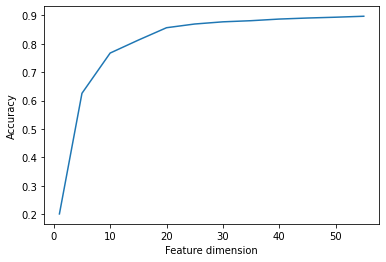

In [25]:
plt.plot(a,accuracy_array)    # Plotting feature dimension vs accuracy plot
plt.xlabel('Feature dimension')
plt.ylabel('Accuracy')



##### From the above graph, it is clear that there is not much increase in accuracy after feature dimension = 20. So, the optimal feature dimension is 20.

# Question 5 

In [20]:
# Calculating precision, recall,f1_score before applying feature reduction.
l_m = LogisticRegression(multi_class='ovr')         # Using one VS rest for multiclass classification.
x_train, x_test, y_train, y_test = train_test_split(d,l,test_size=0.2, random_state=4)
l_m.fit(x_train,y_train)
pred = l_m.predict(x_test)

In [21]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.98      0.96      1197
     class 1       0.94      0.97      0.96      1342
     class 2       0.91      0.88      0.90      1245
     class 3       0.89      0.88      0.88      1225
     class 4       0.92      0.93      0.92      1126
     class 5       0.90      0.86      0.88      1088
     class 6       0.94      0.95      0.94      1172
     class 7       0.93      0.92      0.92      1280
     class 8       0.84      0.86      0.85      1168
     class 9       0.88      0.88      0.88      1157

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000



In [22]:
svd = TruncatedSVD(n_components = 20)
x = svd.fit(d).transform(d)
l_m = LogisticRegression(multi_class='ovr')         # Using one VS rest for multiclass classification.
x_train, x_test, y_train, y_test = train_test_split(x,l,test_size=0.2, random_state=4)
l_m.fit(x_train,y_train)
pred1 = l_m.predict(x_test)

# Calculating precision, recall, f_1 score after applying feature reduction.

In [23]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(y_test, pred1, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.93      0.96      0.95      1197
     class 1       0.91      0.96      0.93      1342
     class 2       0.86      0.81      0.84      1245
     class 3       0.82      0.84      0.83      1225
     class 4       0.84      0.87      0.85      1126
     class 5       0.78      0.76      0.77      1088
     class 6       0.91      0.92      0.92      1172
     class 7       0.88      0.89      0.88      1280
     class 8       0.80      0.77      0.79      1168
     class 9       0.80      0.77      0.79      1157

    accuracy                           0.86     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.86      0.86      0.86     12000

